# MonkeyType Data Report

## Import Statements

In [88]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


 # NOTE: Import statements for the machine learning libraries will happen as I go because those tend to only be used for one code cell

In this report, I will be analyzing typing data from the website I take my typing tests which is [MonkeyType](https://monkeytype.com/). This is really nice because I have been doing typing tests since the beginning of the year. Since I am at my computer typing lots of code and math proofs, it's important to me that I increase my typing speed. This will mean I complete assignments faster and I get more time back in my pocket that I can use in other places. 

Unfortunately, MonkeyType does not let you download your data very easily. In order for me to get all of my typing data. As such, if you are interested in downloading your own typing data from MonkeyType, this is how I learned to do it:

> **How to Download your Typing Data from MonkeyType**
> 1. Go to your accounts page where you can view all your stats on the website
> 2. Open your console, most web browsers can do this by pressing F12 and then clicking on "Console"
> 3. Type the command `copy(snapshot().results)`. This will copy all of your data since the creation of your account to the clipboard.
> 4. Create a new text document and paste your data. It should be a LOT of lines. Save this text document with the `.json` extension. 


This means that I have one singular but HUGE json file where all of my data is stored.


## Data Attributes

My dataset contains the following attributes:

* ID: Every test has a random string ID that can be used for identification
* WPM: Stands for "words per minute" - the words per minute that I got on that test
* Raw WPM: Typers make mistakes when they type, and mistakes are penalized in the calculation of WPM. The Raw WPM would be the WPM scored if mistakes were not taken into account
* acc: short for "accuracy", this score between 0 and 100 is the percent accurate I was on that test
* mode: whether this was a timed test, a quote test, or somet other form of test
* mode2: the value heree depends on the value in mode
    * IF TIMED TEST: mode2 displays the length of the test
    * IF QUOTE TEST: mode2 displays the number of characters in the quote
* quote length: a bit poorly named in my opinion. a 1 means that the test was a quote test, and a -1 means the test was not a quote test. Not sure what additional information this gives us...
* timestamp: the timestamp for when the test occurred
* restart count: how many times the test was restarted
* incomplete test seconds: the total number of seconds all incompleted tests took
* test duration: how long the test took. This is valuable if you got a quote because different quotes take various amounts of time
* afk duration: how many seconds there wsa no user input
* tags: an array of tags put on the test
* consistency: how consistent my typing speed remained over the course of the entire test (measured as a percentage)
* key consistency: 
* chart data: this is a JSON object containing information about my WPM, errors, and raw WPM at every second of my test
* uid:
* key spacing stats:
* key duration stats:
* ir: this column has been depracated since I started this project
* bailed out: Whether a test was cancelled near the end of a test
* blind mode: Whether blind mode was on/off
* lazy mode: Whether lazy mode was on/off
* difficulty: The difficulty level of the test
* funbox: What type of funbox was used in the test
* language: what language I typed in for that test
* numbers: True if numbers appeared on the test and false otherwise
* punctuation: True if punctuation appeared on the test and false otherwise
* is PB: 1 if the test was a PB at the time, otherwise left blank if there was no PB


## Data Cleaning/Aggregation

Since `pandas` conveniently has a `read_json` function, we can get the data into a DataFrame:

In [89]:
mt_df = pd.read_json('monkey_type_data.json')
mt_df.set_index('_id')

,wpm,rawWpm,charStats,acc,mode,mode2,quoteLength,timestamp,restartCount,incompleteTestSeconds,...,ir,bailedOut,blindMode,lazyMode,difficulty,funbox,language,numbers,punctuation,isPb
_id,,,,,,,,,,,,,,,,,,,,,
619be623425285ba199b5465,103.80,109.20,"[519, 7, 0, 3]",97.44,time,60,-1,2021-11-22 18:49:08.000,2,2.84,...,1.0,False,False,False,normal,none,english,False,False,NaN
619bdecb425285ba19784be8,102.98,110.38,"[515, 14, 2, 2]",94.31,time,60,-1,2021-11-22 18:17:48.000,0,0.00,...,1.0,False,False,False,normal,none,english,False,False,NaN
619bde01425285ba197279a1,109.38,116.18,"[547, 13, 2, 2]",95.72,time,60,-1,2021-11-22 18:14:26.000,0,0.00,...,1.0,False,False,False,normal,none,english,False,False,NaN
6171d251653e0be59fcc7d40,110.36,117.36,"[552, 9, 3, 1]",96.94,time,60,-1,2021-10-21 20:49:22.000,1,0.92,...,1.0,False,False,False,normal,none,english,False,False,NaN
6168fde0418b06c0ab798403,108.95,114.34,"[545, 9, 4, 3]",96.85,time,60,-1,2021-10-15 04:04:48.000,2,3.04,...,1.0,False,False,False,normal,none,english,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61182e7af039809de162d25a,82.80,86.40,"[414, 5]",94.65,time,60,-1,2021-01-12 07:14:52.479,0,0.00,...,NaN,False,False,False,normal,none,english,False,False,NaN
61182e7af039809de162d25b,79.19,80.19,"[396, 0]",97.82,time,60,-1,2021-01-12 07:11:25.369,0,0.00,...,NaN,False,False,False,normal,none,english,False,False,NaN
61182e7af039809de162d25c,85.00,87.00,"[425, 4]",96.20,time,60,-1,2021-01-05 04:04:28.898,0,0.00,...,NaN,False,False,False,normal,none,english,False,False,NaN


Initially looking at this data, there are many columns that are not useful to my data analysis. Namely the following:

* afk duration: Whenever I take typing tests, I never stop typing (otherwise what is the point in the typing test?). As such, a column of zeros don't really mean anything
* tags: I don't ever tag any of my tests, so this is just a column of empty lists.  
* uid: My user-ID never changes so it doesn't make sense to include this column
* ir: this column didn't make any sense to me. Wwhen I reached out to the developers, they couldn't tell me what that was either and removed the column
* bailed out: I've never gotten so far where I would 'bail out' so this column has useless information
* language: I only ever type in English
* chart data: this just gives me a play-by-play of wpm, raw wpm, and more at every possible second of testing. Since I only care about the final results to me, I'd rather not have a bunch of giant arrays of second-by-second plays clogging up my dataset
* funbox: I don't even know what this setting does for my typing tests. Considering that I've never messed with it, it doesn't seem like it would have any information that would be relevant to this project
* numbers: I never add numbers into my typing tests (although maybe I should!) so this column gives us no useful information
* difficulty: I didn't even know that it was possible to change the difficulty in settings. Since I didn't change the difficulty, this column presents no relevant information
* blindMode/lazyMode: I never turned these modes on in my typing tests so these columns give no relevant information
* punctuation: I never add punctuation into my typing tests (although maybe I should!) so this column gives no relevant information
* quoteLength: right now it's marked -1 if it was not a quote test and 1 if it was a quote test. This seems pointless because we already have a column that classifies the type of the test.
* mode2: gives the length of the test in seconds... but there is already a column that does that and is more accurate. It displays a different number for quote tests but since I barely did any quote tests I'm likely going to group data by the type of test and not use that data when doing my hypothesis tests so this column seems like it does not have information that I need

As such, the first thing I am going to do is delete these columns from my DataFrame since these columns give no relevant information:

In [90]:
mt_df.drop(columns=['mode2', 'quoteLength', 'afkDuration', 'tags', 'chartData', 'uid', 'ir', 'bailedOut', 'blindMode', 'lazyMode', 'difficulty', 'funbox', 'numbers', 'punctuation', 'language'], inplace=True)
mt_df.set_index('_id')

,wpm,rawWpm,charStats,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb
_id,,,,,,,,,,,,,,
619be623425285ba199b5465,103.80,109.20,"[519, 7, 0, 3]",97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",NaN
619bdecb425285ba19784be8,102.98,110.38,"[515, 14, 2, 2]",94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",NaN
619bde01425285ba197279a1,109.38,116.18,"[547, 13, 2, 2]",95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",NaN
6171d251653e0be59fcc7d40,110.36,117.36,"[552, 9, 3, 1]",96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",NaN
6168fde0418b06c0ab798403,108.95,114.34,"[545, 9, 4, 3]",96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61182e7af039809de162d25a,82.80,86.40,"[414, 5]",94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",NaN
61182e7af039809de162d25b,79.19,80.19,"[396, 0]",97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",NaN
61182e7af039809de162d25c,85.00,87.00,"[425, 4]",96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",NaN


The `_id` column is nice but it's just a random string of characters. Since I'm going to be plotting tests down the line, I would rather the ID for all tests just be integers from 1 to the number of rows in the dataframe.

In [91]:
for i in range(len(mt_df.index)):
    mt_df['_id'][i] = len(mt_df.index) - i

mt_df.set_index('_id')

<ipython-input-91-c8714bf8269c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_df['_id'][i] = len(mt_df.index) - i


,wpm,rawWpm,charStats,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb
_id,,,,,,,,,,,,,,
178,103.80,109.20,"[519, 7, 0, 3]",97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",NaN
177,102.98,110.38,"[515, 14, 2, 2]",94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",NaN
176,109.38,116.18,"[547, 13, 2, 2]",95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",NaN
175,110.36,117.36,"[552, 9, 3, 1]",96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",NaN
174,108.95,114.34,"[545, 9, 4, 3]",96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,"[414, 5]",94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",NaN
4,79.19,80.19,"[396, 0]",97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",NaN
3,85.00,87.00,"[425, 4]",96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",NaN


The next line of business it to deal with the `isPB` column. The way that this was structured when reading in the data, a 1.0 was placed to indicate that the run was indeed a PB. If the run was not a PB, there was a missing value. To clean up the missing values in this column, I am going to put a 0 for every `NaN` value and a 1 otherwise.

In [92]:
# This cell cleans the isPb column of the DataFrame

mt_df['isPb'].fillna(0, inplace=True)
mt_df['isPb'] = mt_df['isPb'].astype(int)
mt_df.set_index('_id')

,wpm,rawWpm,charStats,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb
_id,,,,,,,,,,,,,,
178,103.80,109.20,"[519, 7, 0, 3]",97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",0
177,102.98,110.38,"[515, 14, 2, 2]",94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",0
176,109.38,116.18,"[547, 13, 2, 2]",95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",0
175,110.36,117.36,"[552, 9, 3, 1]",96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",0
174,108.95,114.34,"[545, 9, 4, 3]",96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,"[414, 5]",94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",0
4,79.19,80.19,"[396, 0]",97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",0
3,85.00,87.00,"[425, 4]",96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",0


Finally, there is a lot of data that is still hiding inside of arrays/dictionaries. I would like to be able to pull this data out of their arrays and into their own columns so that it is easier to understand and visualize all of the data.

The first column where this is somewhat of an issue is the charStats column. This contains an array of information. However, the website got an update while I was taking these typing tests and added more data. Since barely any of my tests from this dataset had this update and the added information is not as important, I am only going to keep the first two numbers from that array. The first value is the number of characters I typed correctly in the test and the second value is the number of characters I typed incorrectly during the test.

In this next code cell, I expand out these values into their own columns which are appended to the end of the `mt_df` DataFrame.

In [93]:
num_correct = []
num_incorrect = []

for index in mt_df.index:
    num_correct.append(mt_df['charStats'][index][0])
    num_incorrect.append(mt_df['charStats'][index][1])

mt_df.drop(columns=['charStats'], inplace=True)

mt_df['NumCorrectChars'] = num_correct
mt_df['NumIncorrectChars'] = num_incorrect
mt_df.set_index('_id')

,wpm,rawWpm,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,keySpacingStats,keyDurationStats,isPb,NumCorrectChars,NumIncorrectChars
_id,,,,,,,,,,,,,,,
178,103.80,109.20,97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,"{'average': 109.5, 'sd': 62.29}","{'average': 50.73, 'sd': 18.43}",0,519,7
177,102.98,110.38,94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,"{'average': 104.91, 'sd': 59.62}","{'average': 51.32, 'sd': 19.65}",0,515,14
176,109.38,116.18,95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,"{'average': 102.25, 'sd': 55.15}","{'average': 52.63, 'sd': 19.39}",0,547,13
175,110.36,117.36,96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,"{'average': 101.89, 'sd': 54.78}","{'average': 51.35, 'sd': 19.92}",0,552,9
174,108.95,114.34,96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,"{'average': 104.95, 'sd': 56.99}","{'average': 52.19, 'sd': 18.63}",0,545,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,"{'average': 129.13, 'sd': 86.04}","{'average': 61.76, 'sd': 20.56}",0,414,5
4,79.19,80.19,97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,"{'average': 142.02, 'sd': 111.5}","{'average': 62.63, 'sd': 21.04}",0,396,0
3,85.00,87.00,96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,"{'average': 130.74, 'sd': 92.13}","{'average': 59.67, 'sd': 26.74}",0,425,4


I now need to repeat this process for `keySpacingStats` and `keyDurationStats`. These are bit more complicated because they are stored in dictionaries. Since I know these dictionaries have only average and sd as keys, I will make a keys list and then use that list to index into the dictionaries from the `keySpacingStats` and `keyDurationStats` columns.

In [94]:
keys = ['average', 'sd']
key_spacing_avg = []
key_spacing_sd = []
key_duration_avg = []
key_duration_sd = []

for index in mt_df.index:
    key_spacing_dict = mt_df['keySpacingStats'][index]
    key_duration_dict = mt_df['keyDurationStats'][index]

    key_spacing_avg.append(key_spacing_dict[keys[0]])
    key_spacing_sd.append(key_spacing_dict[keys[1]])
    key_duration_avg.append(key_duration_dict[keys[0]])
    key_duration_sd.append(key_duration_dict[keys[1]])  


mt_df['KeySpacingAvg'] = key_spacing_avg
mt_df['KeySpacingSD'] = key_spacing_sd
mt_df['KeyDurationAvg'] = key_duration_avg
mt_df['KeyDurationSD'] = key_duration_sd

mt_df.drop(columns=['keySpacingStats', 'keyDurationStats'], inplace=True)

mt_df.set_index('_id')

,wpm,rawWpm,acc,mode,timestamp,restartCount,incompleteTestSeconds,testDuration,consistency,keyConsistency,isPb,NumCorrectChars,NumIncorrectChars,KeySpacingAvg,KeySpacingSD,KeyDurationAvg,KeyDurationSD
_id,,,,,,,,,,,,,,,,,
178,103.80,109.20,97.44,time,2021-11-22 18:49:08.000,2,2.84,60.000,79.47,43.46,0,519,7,109.50,62.29,50.73,18.43
177,102.98,110.38,94.31,time,2021-11-22 18:17:48.000,0,0.00,60.010,77.69,43.40,0,515,14,104.91,59.62,51.32,19.65
176,109.38,116.18,95.72,time,2021-11-22 18:14:26.000,0,0.00,60.010,82.12,46.18,0,547,13,102.25,55.15,52.63,19.39
175,110.36,117.36,96.94,time,2021-10-21 20:49:22.000,1,0.92,60.020,82.15,46.35,0,552,9,101.89,54.78,51.35,19.92
174,108.95,114.34,96.85,time,2021-10-15 04:04:48.000,2,3.04,60.030,83.92,45.95,0,545,9,104.95,56.99,52.19,18.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,82.80,86.40,94.65,time,2021-01-12 07:14:52.479,0,0.00,60.003,68.43,34.09,0,414,5,129.13,86.04,61.76,20.56
4,79.19,80.19,97.82,time,2021-01-12 07:11:25.369,0,0.00,60.011,70.34,23.59,0,396,0,142.02,111.50,62.63,21.04
3,85.00,87.00,96.20,time,2021-01-05 04:04:28.898,0,0.00,60.001,75.32,30.58,0,425,4,130.74,92.13,59.67,26.74


For the final step in cleaning up this data, I am going to reorder the columns so they look more presentable. Additionally, the data is sorted my timestamp, where the most *recent* tests are on the top. This is going to make charting weird because the data will be charted from most recent which will show opposite trends. As such, I will flip the entire dataset on it's head so that the data is sorted in the order the tests were taken.

In [95]:
mt_df = mt_df.reindex(columns=['_id', 'wpm', 'mode', 'acc', 'consistency', 'NumCorrectChars', 'NumIncorrectChars', 'KeySpacingAvg', 'KeySpacingSD', 'KeyDurationAvg', 'KeyDurationSD', 'restartCount', 'incompleteTestSeconds',  'timestamp', 'testDuration', 'keyConsistency',  'rawWpm', 'isPb'])

mt_df = mt_df[::-1]

mt_df.set_index('_id')

,wpm,mode,acc,consistency,NumCorrectChars,NumIncorrectChars,KeySpacingAvg,KeySpacingSD,KeyDurationAvg,KeyDurationSD,restartCount,incompleteTestSeconds,timestamp,testDuration,keyConsistency,rawWpm,isPb
_id,,,,,,,,,,,,,,,,,
1,82.60,time,97.01,68.49,413,3,134.88,105.63,61.46,27.33,0,0.00,2021-01-05 03:58:13.893,60.002,23.75,85.00,1
2,96.40,time,99.59,77.50,482,0,123.80,75.83,58.17,26.23,0,0.00,2021-01-05 04:01:56.171,60.003,39.16,96.40,1
3,85.00,time,96.20,75.32,425,4,130.74,92.13,59.67,26.74,0,0.00,2021-01-05 04:04:28.898,60.001,30.58,87.00,0
4,79.19,time,97.82,70.34,396,0,142.02,111.50,62.63,21.04,0,0.00,2021-01-12 07:11:25.369,60.011,23.59,80.19,0
5,82.80,time,94.65,68.43,414,5,129.13,86.04,61.76,20.56,0,0.00,2021-01-12 07:14:52.479,60.003,34.09,86.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,108.95,time,96.85,83.92,545,9,104.95,56.99,52.19,18.63,2,3.04,2021-10-15 04:04:48.000,60.030,45.95,114.34,0
175,110.36,time,96.94,82.15,552,9,101.89,54.78,51.35,19.92,1,0.92,2021-10-21 20:49:22.000,60.020,46.35,117.36,0
176,109.38,time,95.72,82.12,547,13,102.25,55.15,52.63,19.39,0,0.00,2021-11-22 18:14:26.000,60.010,46.18,116.18,0


## The Big Picture Idea

Before we get more specific, let's just eyeball whether my words per minute has improved since 

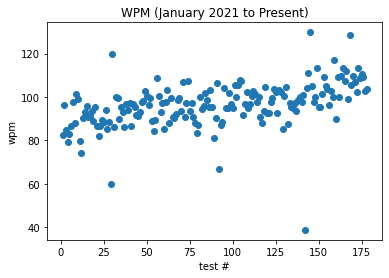

In [96]:
# code for getting my WPM over time

wpm_data = []
y_data = []

for i in range(len(mt_df.index)):
    y_data.append(i+1)

for index in mt_df.index:
    wpm_data.append(mt_df['wpm'][index])

plt.scatter(y_data, wpm_data)
plt.title('WPM (January 2021 to Present)')
plt.xlabel('test #')
plt.ylabel('wpm')
plt.show()

## The All-Important Question - Has my WPM Improved Over Time?

The whole reason I am analyzing this data is for me to find out if I have become a better typer. To best analyze this, I will test this hypothesis:

> Is the difference in WPM bewteen the last-half of the tests I took and the first-half of the tests I took positive? 

In this case, a positive difference would mean that my second half tests are better than my first half tests and I can conclude that my typing speed has improved over time.


To do this, I will need appropriate null and alternative hypotheses. I will use a subscript $1$ to correspond to the typing tests from Jan-March and a subscript $2$ to correspond to the typing tests from April to present. 

* $H_0: \mu_2 \le \mu_1$
* $H_a: \mu_2 > \mu_1$


I am going to use a level of significance $\alpha = 0.01$ and a test statistic for an independent two-sample. This test will be one-tailed. In the following code, I will get the appropriate data and use `scipy` to get the appropriate test statistics:

In [97]:
# iterate through the entire dataframe to build up the WPM lists
data_1 = []
data_2 = []


for index in mt_df.index:
    if (mt_df['timestamp'][index].month <= 3):
        data_1.append(mt_df['wpm'][index])
    else:
        data_2.append(mt_df['wpm'][index])

t, p = stats.ttest_ind(data_1, data_2)
print('test statistic:', t)
print('p-value:', p)

test statistic: -6.122803811454088
p-value: 5.829530835898415e-09


Since the p-value that we received is larger/smaller than our significance level $\alpha = 0.05$, we will reject/not reject $H_0$. This means that my average words per minute did/did not improve after three months of typing tests.